<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [120]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [121]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
#Writing a function to get tokens from document
def tokenize(doc):
    tokens = []
    doc = nlp(doc)
    for token in doc:
        if((token.is_punct==False)&(token.is_stop==False)&(token.is_alpha==True)):
           tokens.append(token.text.lower())
    
    return tokens

In [122]:
# Testing the tokenise fucntion by sending the first yelp review as a document
tokenize(yelp['text'][0])

['beware',
 'fake',
 'fake',
 'fake',
 'small',
 'business',
 'los',
 'alamitos',
 'received',
 'looked',
 'like',
 'legitimate',
 'bill',
 'account',
 'number',
 'called',
 'phone',
 'number',
 'listed',
 'wait',
 'time',
 'hold',
 'said',
 'minutes',
 'leave',
 'message',
 'live',
 'person',
 'phone',
 'matter',
 'number',
 'selected',
 'left',
 'firm',
 'message',
 'contacting',
 'bbb',
 'attorney',
 'company',
 'trying',
 'scam',
 'businesses',
 'illegal']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [124]:
# using the spacy vectors to create vectorisations
def get_vectors(doc):
    doc = nlp(doc)
    
    return doc.vector


In [125]:
yelpvetors = [get_vectors(review) for review in yelp['text'].values]

In [126]:
import numpy as np
yelpvetors = np.array(yelpvetors)

In [127]:
yelpvetors.shape

(10000, 300)

In [128]:
fake_review = "I went to the restuarant in the lunch rush hour and there was no space to wait. \
                The manager was very rude and asked me to come back after 30 minutes but he refused waitlist me.\
                Finally when i placed the order, the food i got was half burnt.\
                  Don't go to this establisment. Service is poor  and food quality is bad"

In [129]:
from sklearn.neighbors import NearestNeighbors
near_near = NearestNeighbors(10)
near_near.fit(yelpvetors)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [130]:
# finding the nearest neigbours to the fake reivew
neighbours = near_near.kneighbors(np.array(get_vectors(fake_review)).reshape(1,-1))
neighbours

(array([[0.53463319, 0.54520934, 0.5469089 , 0.54805095, 0.55250154,
         0.56342904, 0.56857038, 0.57167312, 0.5746451 , 0.57670553]]),
 array([[2394, 8831, 9381, 8865, 8786,  358, 4854, 5858, 5516, 3104]]))

In [131]:
# Printing the 10 similar review from yelp which are similar to fake review
for index in neighbours[1]:
    print(yelp.iloc[index]['text'].values)


['I was at this Opa today and it sucked!  Here\'s how it all played out folks. I went with 3 coworkers for lunch. We got to the mall at 1130 so that we could avoid the lunch rush. I had Opa on the weekend at a different location and it was so good I thought i would go back. As a vegetarian, the falafel option is a good one for me.  There was a girl behind the counter who looked like she should have been in  "Night of the Living Dead" eyes glazed over, completely ignorant to the fact that myself and someone else were waiting.  She was making a huge bowl of Salad ( I guess getting ready for the lunch rush I was trying to avoid).  A few minutes later ( literally) another staff member came out and was putting frozen kabobs of chicken and beef on the grill. She then stopped and took the guys order in front of me....then about 4 minutes later she got to me, another 5 minutes I was getting my food.  By that time the line was huge but that didn\'t affect the zombies behind the counter, they ju

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [132]:
#creating function to get lemmas of review to input for TfidVector
def get_lemmas(df):
    ncks = []
    for doc in df:
        doc = nlp(doc)
        tokens = ""
        for token in doc:
            if((token.is_stop==False) & (token.is_punct==False)&(token.is_alpha==True)):
                tokens += token.lemma_ + " "
        ncks.append(tokens)
    return ncks

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [134]:
#Getting lemmas from the yelp reviews
yelp['lemmas'] = get_lemmas(yelp['text'])

In [135]:
yelp['lemmas'].head()

0    beware fake fake fake small business Los Alami...
1    come lunch Togo service quick staff friendly c...
2    Vegas dozen time step foot Circus Circus reaso...
3    go night close street party good actually grou...
4    star bad price lunch senior pay eat hot food s...
Name: lemmas, dtype: object

In [136]:
# creating a pipeline

pipe = Pipeline([
        ('tfid',TfidfVectorizer(stop_words='english',min_df=0.025,max_df=0.95,max_features=500)),
        ('rfc',RandomForestClassifier(n_estimators=100))
        ])


parameters = { 
    'vect__max_df': ( 0.75,0.95),
    'vect__min_df': (.025,0.05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(10,20),
    'clf__max_depth':(3,5)
}

### Commenting the GridSearch code , as the notebook is crashing due to memory allocation problem

In [ ]:


#Using grid search to fit for the best paramaeters
# grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(yelp.lemmas, yelp.stars)

In [137]:
#fitting the data to the pipeline
pipe.fit(yelp.lemmas,yelp.stars)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=500, min_df=0.025,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [138]:
#predicting the star for the fake review
pipe.predict(get_lemmas([fake_review]))[0]

1

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [ ]:
! pip install gensim==3.6.0

In [16]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary


Learn the vocubalary of the yelp data:

In [60]:
id2word = Dictionary(yelp['lemmas'].str.split())
id2word

In [61]:
#checking the dictionary created
id2word.doc2bow(tokenize("This is a sample yelp review which i am writing"))

[(530, 1), (680, 1), (3994, 1), (25333, 1)]

In [62]:
len(id2word)

25767

Create a bag of words representation of the entire corpus

In [63]:
corpus = [id2word.doc2bow(text) for text in yelp['lemmas'].str.split()]

Your LDA model should be ready for estimation: 

In [ ]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [67]:
lda.print_topics()

[(0,
  '0.012*"place" + 0.012*"good" + 0.011*"time" + 0.009*"great" + 0.009*"food" + 0.008*"come" + 0.007*"go" + 0.007*"order" + 0.006*"like" + 0.005*"get"'),
 (1,
  '0.012*"good" + 0.011*"food" + 0.009*"service" + 0.008*"get" + 0.008*"come" + 0.008*"place" + 0.008*"try" + 0.007*"time" + 0.007*"like" + 0.007*"great"'),
 (2,
  '0.014*"good" + 0.010*"food" + 0.009*"place" + 0.009*"service" + 0.008*"order" + 0.008*"come" + 0.008*"time" + 0.007*"great" + 0.007*"like" + 0.006*"go"'),
 (3,
  '0.018*"good" + 0.012*"place" + 0.009*"food" + 0.008*"like" + 0.007*"service" + 0.007*"great" + 0.007*"time" + 0.006*"come" + 0.006*"order" + 0.006*"go"'),
 (4,
  '0.012*"good" + 0.012*"great" + 0.011*"time" + 0.009*"place" + 0.009*"food" + 0.009*"like" + 0.007*"service" + 0.006*"come" + 0.005*"get" + 0.005*"look"'),
 (5,
  '0.011*"place" + 0.011*"good" + 0.011*"food" + 0.010*"time" + 0.007*"great" + 0.006*"come" + 0.006*"get" + 0.006*"like" + 0.006*"go" + 0.006*"service"'),
 (6,
  '0.013*"good" + 0.011*

In [68]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
for t in topics: 
    print(t)
    print("\n")

place good time great food come go order like get


good food service get come place try time like great


good food place service order come time great like go


good place food like service great time come order go


good great time place food like service come get look


place good food time great come get like go service


good place great like come food order time go service


good food come great time service order place like go


place good food great time like order come service get


place good like food come get order service great go




In [83]:
from collections import Counter

alltopics = [topic.split() for topic in topics]
topicslist = [item for sublist in alltopics for item in sublist]

In [88]:
counttopics = Counter(topicslist)

In [93]:
topicsdf = pd.DataFrame(counttopics.keys(),counttopics.values()).reset_index()
topicsdf.columns = ['no_of_items','topic']

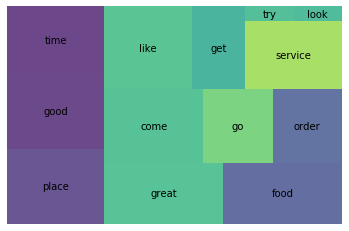

In [97]:
#showing the visualisation for top 10 topics in the yelp reviews
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=topicsdf['no_of_items'], label=topicsdf['topic'], alpha=.8 )
plt.axis('off')
plt.show()

## Observation on Topics from using LDA

As we can see from the above plot, the important topics in any of the yelp reviews is **Good Food*, **Good Place** and further topics such as **great food**, **on time**, **order**

We know from observation that yelp is about rating the business establishments especially food joints and restuarants

But using LDA, the model after looking at the yelp revies, it has identified that the reviews are about food and the places of food. This indicates to us the model was able to identify the reviews correctly

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [140]:
## Identify Business Entities from Yelp Reviews

rowent = []
for doc in yelp['text']:
    doc = nlp(doc)
    entities = []
    for ent in doc.ents:
        if(ent.label_ in ['GPE','PERSON','ORG']):
            entities.append(ent)
    rowent.append(entities)
yelp['entities'] = rowent

In [141]:
# checking for the entities identified 
yelp['entities'][:20]

0                        [(Los, Alamitos), (CA), (BBB)]
1                                              [(Togo)]
2     [(Vegas), (Circus, Circus), (Vegas), (Circus, ...
3                                          [(Facebook)]
4                                                    []
5                                     [(Taco, Tuesday)]
6                                [(Airy), (Las, Vegas)]
7                                                    []
8                                   [(Charlotte), (Nc)]
9                                          [(Stations)]
10                                  [(Aprilé, Bambina)]
11                                  [(Thw), (AC), (AC)]
12                                                   []
13                                                   []
14           [(Bryan), (Bryan), (ROC), (Goettl), (ARS)]
15                                          [(Buffalo)]
16           [(Charlotte), (UGA), (Louisville), (T.V.)]
17                               [(Montreal), (A

## Comparison of Vectorisation for Document Classification

For Vectorisation , we can use CountVectoriser , TFIDVectoriser, Vectors from Spacy 

The main difference between CountVectoriser and TFIDVectoriser is that CountVectoriser doesn't take into account the length of the document into consideration, due to this a lengthy document in comparison to a short document will be given higher weightage

This problem is rectified by TFIDVectoriser by looking for commonality of words across all documents and then looking for unique words in a single document which differentiate it from other documents. It also normalises the count between 0 and 1

The Advantage of Using Vectorisation from spacy is that , spacy creates vector based on context of the word in comparison to the document. It is able to do that as it has trained its words against a large collection of documents and usign the vectorisation from spacy will also preserve the context of words in the document